In [5]:
# import all necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Create Circuit
circuit = QuantumCircuit(3)

# Prepare Bell State and distribute Qubits
circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

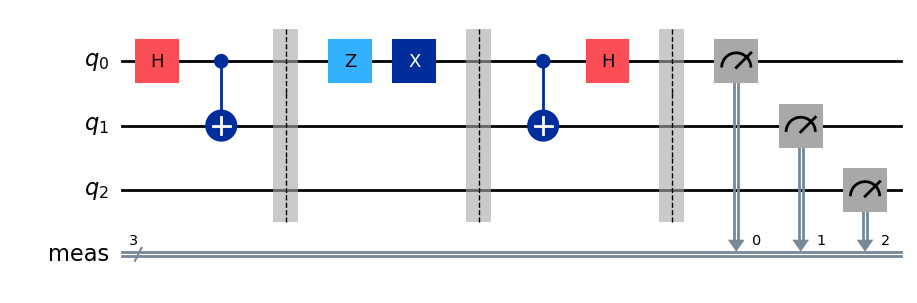

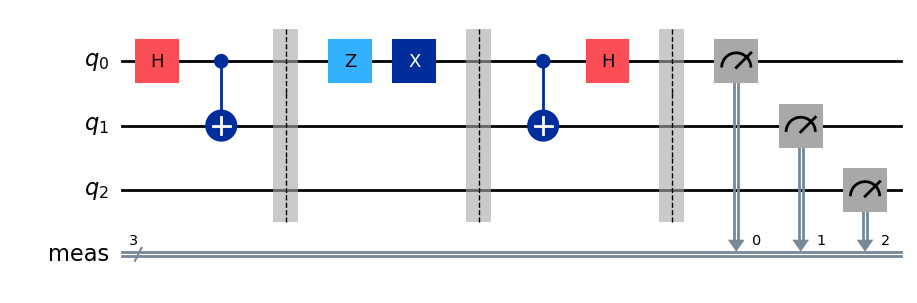

In [7]:
# Olivia encodes her message and transmits her qubit to Barron
match message := '11':  # the message
    case '00':
        circuit.id(0)
    case '01':
        circuit.z(0)
    case '10':
        circuit.x(0)
    case '11':
        circuit.z(0)
        circuit.x(0)

circuit.barrier()

# Barron decodes Olivia's message
circuit.cx(0, 1)
circuit.h(0)

# Barron measures the qubits to read Olivia's message
circuit.measure_all()
circuit.draw(output='mpl')

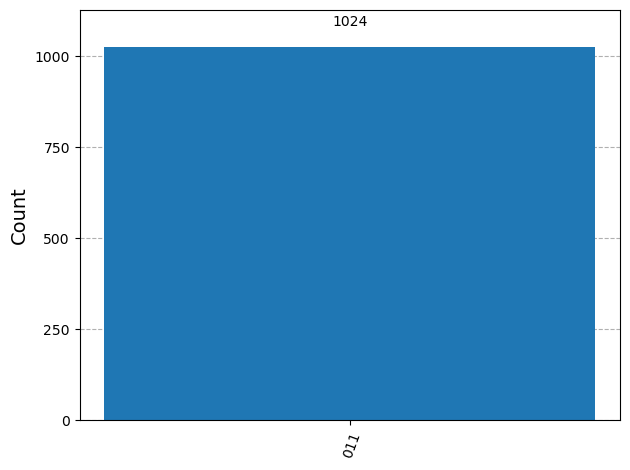

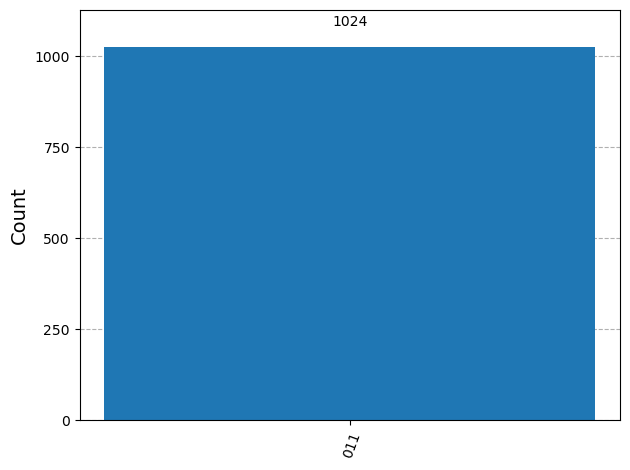

In [9]:
# Use AerSimulator instead of BasicProvider
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Run the simulation
job = simulator.run(compiled_circuit)
result = job.result()

# Plot the results
counts = result.get_counts()
plot_histogram(counts)